In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from IPython.display import display
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import  linear_model

In [2]:
data = pd.read_csv('./data/train.csv')
display(data.head(n=10))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



We can see that the first column indicates the respective number, and the following 784 columns contain a intensity value ranging from 0 to 255. They describe a 28 x 28 image that contains the handwritten number.

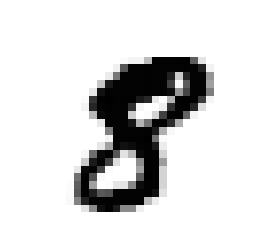

In [3]:
#display one of them
ex_row = data.iloc[[10]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")
plt.imshow(ex_img, cmap = 'Greys')
plt.axis('off')
plt.show()

In [4]:
display(ex_row[0])

8

# Restructuring the Data Set and Learning the Classifier

In [5]:
data_matrix = data.as_matrix()

X = data_matrix[:, 1:]
y = data_matrix[:, 0]

# Test

In [6]:
test_data = pd.read_csv('./data/test.csv').as_matrix()
display(test_data.shape)

(28000, 784)

In [7]:
#Random forest

rfc = RandomForestClassifier(n_estimators=100).fit(X, y)

predicted_numbers = rfc.predict(test_data)
display(predicted_numbers)

RF_acc = round(rfc.score(X, y) * 100, 2)
print (RF_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('RF_results.csv', sep=',', index=False)

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

100.0


In [8]:
#linear regression
regr = linear_model.LinearRegression().fit(X,y)

predicted_numbers = regr.predict(test_data)
display(predicted_numbers)


regr_acc=round(regr.score(X, y) * 100, 2)
print(regr_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('regr_results.csv', sep=',', index=False)

array([ 1.43861826, -0.08319158,  6.58227669, ...,  3.4640699 ,
        6.87840524,  2.55183205])

62.2


In [ ]:
#logistic regression
clf = LogisticRegression().fit(X,y)

predicted_numbers = clf.predict(test_data)
display(predicted_numbers)


clf_acc=round(clf.score(X, y) * 100, 2)
print(clf_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('clf_results.csv', sep=',', index=False)

In [ ]:
svc = SVC().fit(X,y)

predicted_numbers = svc.predict(test_data)
display(predicted_numbers)


svc_acc=round(svc.score(X, y) * 100, 2)
print(svc_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('svc_results.csv', sep=',', index=False)

In [76]:
#Linear svc

ln_svc = LinearSVC().fit(X,y)

predicted_numbers = ln_svc.predict(test_data)
display(predicted_numbers)


ln_svc_acc=round(ln_svc.score(X, y) * 100, 2)
print(ln_svc_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('lnsvc_results.csv', sep=',', index=False)

(28000, 784)

In [ ]:
#Decision tree

DT=DecisionTreeClassifier(100).fit(X,y)

predicted_numbers = DT.predict(test_data)
display(predicted_numbers)


DT_acc=round(DT.score(X, y) * 100, 2)
print(DT_acc)


results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('DT_results.csv', sep=',', index=False)


array([ 1.43861826, -0.08319158,  6.58227669, ...,  3.4640699 ,
        6.87840524,  2.55183205])

62.2
